In [119]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator): #BaseEstimator 클래스의 상속으로 커스텀 Estimator를 제작할 수 있음
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
     
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('../../data/titanic/train.csv')
y = titanic_df['Survived']
X = titanic_df.drop('Survived',axis=1)
X = transform_features(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [123]:
my_classifier = MyDummyClassifier()
my_classifier.fit(X_train,y_train)

predictions = my_classifier.predict(X_test)
print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test,predictions)))

Dummy Classifier의 정확도 : 0.7877


In [124]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self,X):
        return np.zeros( (len(X),1), dtype=bool)


In [125]:
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y, random_state=11)

In [126]:
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [127]:
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train,y_train)

In [128]:
fakepred = fake_clf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:0.4f}'.format(accuracy_score(fakepred,y_test)))


모든 예측을 0으로 하여도 정확도는: 0.9000


In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy} , Precision :,{precision} recall : ,{recall }')


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('../../data/titanic/train.csv')
y = titanic_df['Survived']
X = titanic_df.drop('Survived',axis=1)
X = transform_features(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659217877094972 , Precision :,0.8245614035087719 recall : ,0.7704918032786885


In [132]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {}'.format(pred_proba.shape))
print(pred_proba[:3])

pred_proba()결과 shape : (179, 2)
[[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]


In [133]:
from sklearn.preprocessing import Binarizer

X = [[-1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]


# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))   

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [134]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)  #positive class의 확률만 추출
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212290502793296 , Precision :,0.704225352112676 recall : ,0.819672131147541


predict() 는 predict_proba()에 기반함을 알 수 있다.

threshold 변경

In [135]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)  #positive class만 취한다.
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)  
custom_predict = binarizer.transform(pred_proba_1) #threshold기반하여 0,1 분류(predict)

get_clf_eval(y_test, custom_predict)  #precision, recall trade-off가 발생하는것을 알 수 있음. (threshold를 낮추면 recall은 상승하지만 precision은 감소)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212290502793296 , Precision :,0.704225352112676 recall : ,0.819672131147541


In [136]:
#threshold를 0.4에서 0.6까지 0.05증가시키며 평가지표 조사
thresholds = [0.4,0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212290502793296 , Precision :,0.704225352112676 recall : ,0.819672131147541
임곗값: 0.4
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547486033519553 , Precision :,0.7868852459016393 recall : ,0.7868852459016393
임곗값: 0.4
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659217877094972 , Precision :,0.8245614035087719 recall : ,0.7704918032786885
임곗값: 0.4
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715083798882681 , Precision :,0.8653846153846154 recall : ,0.7377049180327869
임곗값: 0.4
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8770949720670391 , Precision :,0.8979591836734694 recall : ,0.7213114754098361


In [137]:
#precision_recall_curve API를 이용해봅니다.
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]  

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)


(147,)


In [138]:
thr_idx = np.arange(0, thresholds.shape[0],15)
print('샘플 threshold index:' , thr_idx)
print('샘플용 10개의 threshold 값 :' , np.round(thresholds[thr_idx],2))  #threshold 설정 기준?

샘플 threshold index: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 threshold 값 : [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [139]:
print(' 샘플 threshold별 정밀도 : ', np.round(precisions[thr_idx], 3))
print(' 샘플 threshold별 재현율 : ', np.round(recalls[thr_idx],3))

 샘플 threshold별 정밀도 :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
 샘플 threshold별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [140]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls , thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    # X축을 threshold값으로, Y축을 precision, recall값으로 각각 plot수행
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='preicison')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # X축 threshold값의 Scale을 0.1단위로 변경
    start , end = plt.xlim() # 현재 xlimit()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('threshold') ; plt.ylabel('preicision & recall')
    plt.legend() ; plt.grid()
    plt.show()
    

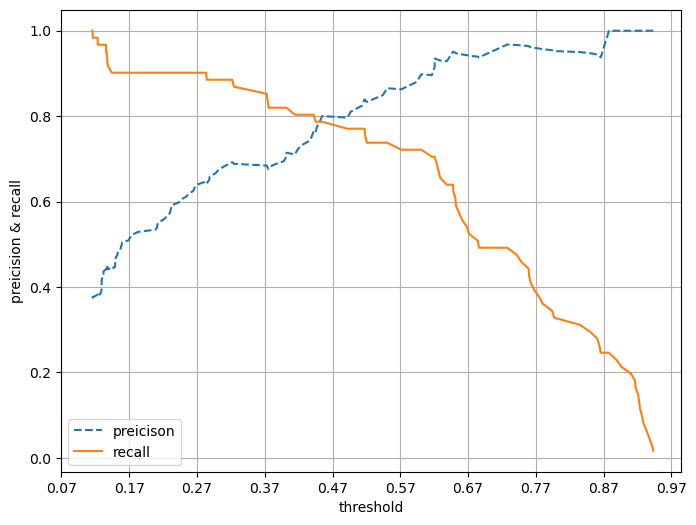

In [141]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

단, 정밀도와 재현율을 높이기위해, 즉 모델의 성능을 높이기위해 임의의 threshold를 선택하면 안된다.

In [142]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 :{0:.4f}'.format(f1))

F1 스코어 :0.7966


In [143]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    #F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print('정확도 {:.4f}, precision : {:.4f}, recall : {:.4f} , f1 : {:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
confusion matrix
[[97 21]
 [11 50]]
정확도 0.8212, precision : 0.7042, recall : 0.8197 , f1 : 0.7576
임곗값: 0.4
confusion matrix
[[105  13]
 [ 13  48]]
정확도 0.8547, precision : 0.7869, recall : 0.7869 , f1 : 0.7869
임곗값: 0.4
confusion matrix
[[108  10]
 [ 14  47]]
정확도 0.8659, precision : 0.8246, recall : 0.7705 , f1 : 0.7966
임곗값: 0.4
confusion matrix
[[111   7]
 [ 16  45]]
정확도 0.8715, precision : 0.8654, recall : 0.7377 , f1 : 0.7965
임곗값: 0.4
confusion matrix
[[113   5]
 [ 17  44]]
정확도 0.8771, precision : 0.8980, recall : 0.7213 , f1 : 0.8000


In [144]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 thresholds중 5step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 threshold 배열의 index: ', thr_index)
print('샘플 index로 추출한 threshold :', np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],3))

샘플 추출을 위한 threshold 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 threshold : [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


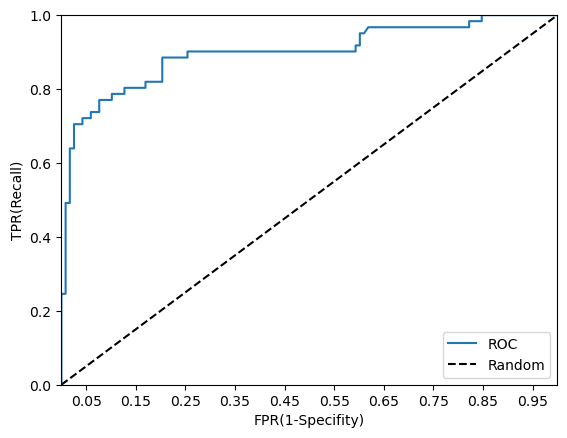

In [145]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    #FPR X 축의 Scale을 0.1단위로 변경, X, Y축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specifity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

ROC curve는 FPR과 TPR의 변화 값을 보는데 이용하며 분류의 성능 지표 자체로 사용되는것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.

In [146]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('ROC AUC 값: {:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


## 피마 인디언 당뇨병 예측

In [147]:
pwd

'/Users/b12/Desktop/dailystudycode/study_repo/scikit-learn'

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('../../data/diabetes.csv')

In [149]:
print(data['Outcome'].value_counts())
data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear') #로지스틱 회귀는 normal equation이 아닌 iteratvie method이기때문에 방법을 선택해야함
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [161]:
def get_clf_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test ,pred)
    f1 = f1_score(y_test,pred)
    # ROC - AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) #binary가 아닌 확률값인 pred_proba를 인자로 받음 (각 threshold에 대해서 평가하기 때문))
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f} , F1-score : {:.4f}, AUC : {:.4f}'.format(accuracy, precision,recall, f1, roc_auc))


In [153]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926 , F1-score : 0.6465, AUC : 0.8083


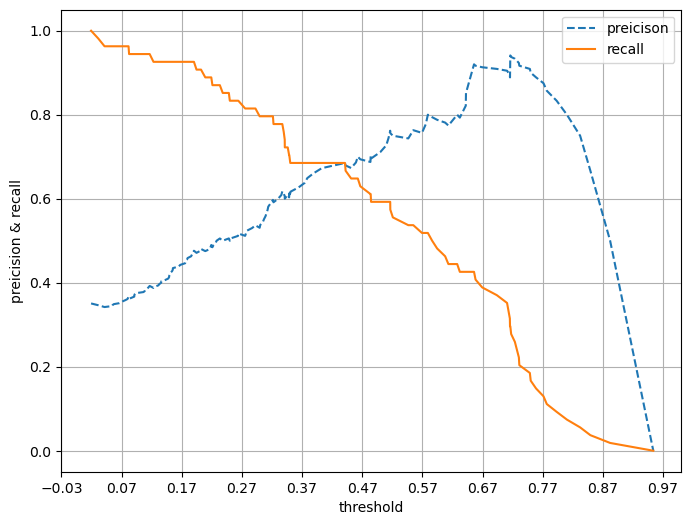

In [154]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [155]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [156]:
check_list = ['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']
total_count = len(data) # data['Glucose'].count()

for feature in check_list:
    zero_count = len(data[data[feature] ==0])
    print(f'{feature}건수는 {zero_count} 비율은 {100*zero_count/total_count:.2f}%')
    
    

Glucose건수는 5 비율은 0.65%
BloodPressure건수는 35 비율은 4.56%
SkinThickness건수는 227 비율은 29.56%
Insulin건수는 374 비율은 48.70%
BMI건수는 11 비율은 1.43%


In [157]:
mean_check_list = data[check_list].mean()
# 0대신 평균으로 대체
data[check_list] = data[check_list].replace(0, mean_check_list)

In [158]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#standardscaler를 통하여 피쳐 세트에 대해 일괄적인 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.2, random_state=156 ,stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)


오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , F1-score : 0.6804, AUC : 0.8433


In [159]:
# 참고
print(pred_proba.shape, pred_proba.reshape(-1,1).shape)

(154,) (154, 1)


In [166]:
# threshold를 변경해가면서 성능지표 확인하기
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)


get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율 : 0.7963 , F1-score : 0.6615, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 : 0.7778 , F1-score : 0.6774, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222 , F1-score : 0.6667, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037 , F1-score : 0.6667, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667 , F1-score : 0.6792, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667 , F1-score : 0.6857, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481 , F1-score : 0.6931, AUC : 0.8433
임곗값: 0.4
오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , F1-score : 0.6804, AUC : 0.8433


In [167]:
binarizer = Binarizer(threshold=0.48)

In [168]:
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))   #binarzizer의 입력은 pred_proba

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481 , F1-score : 0.6931, AUC : 0.8433
